<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import requests
from io import StringIO
import re
import datetime

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
violations = pd.read_csv('../data/hubNashville__311__Service_Requests.csv')

C:\Users\maeva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#Set API url
url = 'https://data.nashville.gov/resource/7qhx-rexh.csv'

#create request object
r = requests.get(url)

#convert to csv
covid_violations = pd.read_csv(StringIO(r.text))

covid_violations.info()

In [4]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479306 entries, 0 to 479305
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Request #                   479306 non-null  int64  
 1   Status                      479306 non-null  object 
 2   Request Type                478975 non-null  object 
 3   Subrequest Type             475816 non-null  object 
 4   Additional Subrequest Type  475665 non-null  object 
 5   Date / Time Opened          479306 non-null  object 
 6   Date / Time Closed          467913 non-null  object 
 7   Request Origin              479306 non-null  object 
 8   System of Origin ID         29204 non-null   object 
 9   Contact Type                27446 non-null   object 
 10  Preferred Language          0 non-null       float64
 11  State Issue                 479306 non-null  bool   
 12  Parent Request              5122 non-null    float64
 13  Closed When Cr

In [5]:
violations['Request Type'].unique()

array(['Trash, Recycling & Litter', 'Property Violations',
       'Streets, Roads & Sidewalks', 'Other', 'Transit',
       'Resolved by hubNashville on First Call',
       'Electric & Water General', 'Public Safety', 'Permits',
       'Police Chief Search', 'Parks', 'Planning & Zoning',
       'Social Services & Housing', 'COVID-19', 'Hands On Volunteers',
       'Storm Relief', 'Public Records Request', 'Quick Requests',
       'Workforce & Jobs', 'Education & Libraries',
       'Admin Support Request', nan, 'WIRES',
       'Submit Budget Ideas to Mayor Briley',
       'Consumer Protection Request', 'BRUSH'], dtype=object)

In [6]:
covid_only = violations[violations['Request Type']== 'COVID-19']
covid_only['Subrequest Type'].unique()

array(['COVID-19 Violations', 'COVID-19 Questions',
       'COVID-19 Guidance for Reopening Businesses',
       'COVID-19 - Submit Input about The Plan to Reopen Nashville', nan],
      dtype=object)

In [7]:
covid_only = covid_only[covid_only['Subrequest Type']== 'COVID-19 Violations']

In [8]:
covid_only['Address'].value_counts()

210 Anne Dallas Dudley Blvd    287
21B Fern Ave                   117
333 Commerce St                 51
5106 Old Hickory Blvd           51
221 Broadway                    47
                              ... 
1404a Davidson St                1
2nd Ave N & Broadway Ave NB      1
1101 Jefferson St                1
950 Madison Square               1
1415 Murfreesboro road           1
Name: Address, Length: 4829, dtype: int64

In [9]:
covid_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11632 entries, 1547 to 479249
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Request #                   11632 non-null  int64  
 1   Status                      11632 non-null  object 
 2   Request Type                11632 non-null  object 
 3   Subrequest Type             11632 non-null  object 
 4   Additional Subrequest Type  11623 non-null  object 
 5   Date / Time Opened          11632 non-null  object 
 6   Date / Time Closed          11611 non-null  object 
 7   Request Origin              11632 non-null  object 
 8   System of Origin ID         0 non-null      object 
 9   Contact Type                46 non-null     object 
 10  Preferred Language          0 non-null      float64
 11  State Issue                 11632 non-null  bool   
 12  Parent Request              1 non-null      float64
 13  Closed When Created        

In [10]:
covid_only['Address'].value_counts()

210 Anne Dallas Dudley Blvd    287
21B Fern Ave                   117
333 Commerce St                 51
5106 Old Hickory Blvd           51
221 Broadway                    47
                              ... 
1404a Davidson St                1
2nd Ave N & Broadway Ave NB      1
1101 Jefferson St                1
950 Madison Square               1
1415 Murfreesboro road           1
Name: Address, Length: 4829, dtype: int64

In [11]:
covid_only = covid_only.drop(columns=['System of Origin ID','Contact Type','Preferred Language','Parent Request']).reset_index()

In [12]:
covid_only.shape

(11632, 18)

In [13]:
covid_only['City'].value_counts()

NASHVILLE         8627
MADISON            582
ANTIOCH            470
HERMITAGE          431
GOODLETTSVILLE     207
OLD HICKORY        200
BRENTWOOD           50
JOELTON             43
WHITES CREEK        27
LAVERGNE             9
NOLENSVILLE          5
Nashville            1
LA VERGNE            1
Name: City, dtype: int64

In [14]:
covid_only[covid_only['City'] == 'Nashville']

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
13,22299,361889,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,05/07/2020 06:57:32 PM,05/08/2020 05:08:50 PM,Phone,False,False,1297 Antioch Pike,Nashville,NaN,37211,NaN,NaN,NaN


In [15]:
covid_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11632 entries, 0 to 11631
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       11632 non-null  int64  
 1   Request #                   11632 non-null  int64  
 2   Status                      11632 non-null  object 
 3   Request Type                11632 non-null  object 
 4   Subrequest Type             11632 non-null  object 
 5   Additional Subrequest Type  11623 non-null  object 
 6   Date / Time Opened          11632 non-null  object 
 7   Date / Time Closed          11611 non-null  object 
 8   Request Origin              11632 non-null  object 
 9   State Issue                 11632 non-null  bool   
 10  Closed When Created         11632 non-null  bool   
 11  Address                     11258 non-null  object 
 12  City                        10653 non-null  object 
 13  Council District            106

In [16]:
covid_only.iloc[13,12] = covid_only.iloc[13,12].upper()

In [17]:
covid_only['City'].value_counts()

NASHVILLE         8628
MADISON            582
ANTIOCH            470
HERMITAGE          431
GOODLETTSVILLE     207
OLD HICKORY        200
BRENTWOOD           50
JOELTON             43
WHITES CREEK        27
LAVERGNE             9
NOLENSVILLE          5
LA VERGNE            1
Name: City, dtype: int64

In [18]:
covid_only[covid_only['City']=='LA VERGNE']

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
9518,401452,442297,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/11/2020 02:50:02 PM,08/12/2020 03:47:37 PM,Phone,False,False,Firestone Pkwy & Old Hickory Blvd,LA VERGNE,33.0,37086,36.01689,-86.61985,"(36.01689, -86.61985)"


In [19]:
covid_only.iloc[9518,12] = 'LAVERGNE'

In [20]:
covid_only['ZIP'].value_counts()

37203.0    814
37211.0    643
37209.0    519
37207.0    485
37115.0    456
37214.0    429
37221.0    414
37203      387
37013.0    366
37201.0    366
37204.0    322
37219.0    320
37076.0    314
37210.0    251
37217.0    232
37215.0    225
37206.0    221
37211      213
37216.0    212
37209      206
37205.0    204
37208.0    194
37072.0    170
37214      164
37201      164
37221      147
37204      140
37138.0    140
37219      139
37207      129
37115      126
37076      120
37212.0    115
37218.0    115
37217      113
37013      110
37215      107
37228.0     91
37210       87
37206       79
37216       76
37205       73
37138       60
37212       51
37218       47
37208       43
37072       39
37027.0     37
37213.0     29
37080.0     27
37189.0     22
37228       18
37086.0     17
37080       16
37027       15
37220.0     14
37213       14
37246.0      7
37220        6
37075.0      5
37232.0      5
37240.0      5
37189        5
37064.0      4
37122.0      4
37135        4
37232     

In [21]:
covid_only['ZIP'] = covid_only['ZIP'].fillna(0).apply(str)

In [22]:
covid_only['ZIP'].unique()

array(['37013.0', '37214.0', '37204.0', '37218.0', '37203.0', '37206.0',
       '37207.0', '37209.0', '37211.0', '37115.0', '0', '37216.0',
       '37076.0', '37212.0', '37210.0', '37219.0', '37205.0', '37201.0',
       '37072.0', '37215.0', '37220.0', '37221.0', '37217.0', '37027.0',
       '37232.0', '37080.0', '37208.0', '37138.0', '37228.0', '37240.0',
       '37064.0', '37130.0', '37075.0', '37086.0', '38506.0', '37122.0',
       '37160.0', '37073.0', '37246.0', '37129.0', '37067.0', '37363.0',
       '37172.0', '38401.0', '37189.0', '37213.0', '37090.0', '37663.0',
       '37087.0', '37040.0', '37066.0', '37036.0', '37135.0', '37201',
       '37203', '37209', '37027', '37214', '37207', '37221', '37080',
       '37211', '37219', '37206', '37138', '37076', '37115', '37204',
       '37217', '37218', '37213', '37215', '37208', '37212', '37216',
       '37205', '37013', '37228', '37210', '37072', '37086', '37232',
       '37220', '37189', '37135', '37240'], dtype=object)

In [23]:
covid_only['ZIP'] = covid_only['ZIP'].str.replace('(\.\d)','')

In [24]:
covid_only[covid_only['ZIP']=='0']

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
16,23181,362249,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,05/07/2020 10:31:04 PM,05/11/2020 02:57:54 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
31,35402,426840,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 02:26:28 AM,07/30/2020 03:35:55 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
67,46641,426586,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/25/2020 04:25:26 PM,07/27/2020 04:59:17 PM,hubNashville Community,False,False,625 Sgt. Paul Huff Parkway Northwest,NaN,NaN,0,35.210383,-84.859861,"(35.21038347906778, -84.85986115231826)"
124,83511,440804,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/08/2020 12:19:06 PM,08/10/2020 04:22:25 PM,hubNashville Community,False,False,7630 Hwy 70 S,NaN,NaN,0,36.080078,-86.949125,"(36.08007791157165, -86.9491254932541)"
125,83553,440857,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/08/2020 04:19:52 PM,08/10/2020 03:01:55 PM,hubNashville Community,False,False,7115 Bakers Bridge Ave,NaN,NaN,0,35.962645,-86.818637,"(35.96264471152191, -86.81863690674592)"
128,83953,445103,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/14/2020 03:48:58 PM,08/17/2020 04:10:17 PM,Phone,False,False,City Cafe,NaN,NaN,0,36.024840,-86.790050,"(36.02484, -86.79005)"
132,84263,452258,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/26/2020 02:27:17 AM,08/26/2020 02:00:29 PM,hubNashville Community,False,False,204 Ward Cir,NaN,NaN,0,36.031784,-86.799381,"(36.031784411551186, -86.79938060674591)"
142,88469,427093,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 08:09:52 PM,07/27/2020 04:57:45 PM,hubNashville Community,False,False,1418 W Main St,NaN,NaN,0,36.216656,-86.331393,"(36.2166558, -86.3313934)"
177,95999,418844,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/17/2020 02:09:23 AM,07/17/2020 03:55:23 PM,hubNashville Community,False,False,330 Rockland Rd,NaN,NaN,0,36.302764,-86.650208,"(36.3027638, -86.6502082)"
179,96020,348367,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/18/2020 01:03:09 AM,04/20/2020 03:59:36 PM,hubNashville Community,False,False,720 Thurrock Cir,NaN,NaN,0,36.009454,-86.749357,"(36.00945430000001, -86.74935699999999)"


In [25]:
covid_only[covid_only['Address'].isna()]

,index,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,State Issue,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
16,23181,362249,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,05/07/2020 10:31:04 PM,05/11/2020 02:57:54 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
31,35402,426840,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 02:26:28 AM,07/30/2020 03:35:55 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
39,37075,426843,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 02:33:28 AM,07/27/2020 08:15:16 PM,hubNashville Community,False,False,NaN,NASHVILLE,19.0,37203,36.156583,-86.787453,"(36.15658331160417, -86.78745279999998)"
111,81601,440879,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/08/2020 05:44:18 PM,08/10/2020 03:42:04 PM,hubNashville Community,False,False,NaN,NASHVILLE,26.0,37211,36.088985,-86.741833,"(36.08898508095092, -86.74183345642209)"
159,91716,427043,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,07/26/2020 05:48:15 PM,07/27/2020 05:01:15 PM,hubNashville Community,False,False,NaN,NASHVILLE,19.0,37201,36.161483,-86.775970,"(36.161483199590116, -86.77596987010585)"
230,97382,357165,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,05/01/2020 11:58:35 PM,05/05/2020 03:16:28 PM,hubNashville Community,False,False,NaN,ANTIOCH,28.0,37013,36.068966,-86.681323,"(36.06896551156693, -86.6813232)"
410,103141,352632,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/24/2020 11:19:27 PM,04/28/2020 05:45:24 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
447,104688,397349,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,06/22/2020 01:13:36 PM,06/26/2020 03:56:51 PM,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
572,107177,336223,New,COVID-19,COVID-19 Violations,COVID-19 Violations,03/31/2020 09:20:41 PM,NaN,hubNashville Community,False,False,NaN,NaN,NaN,0,NaN,NaN,NaN
607,107848,340833,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/06/2020 10:10:37 PM,04/10/2020 06:25:10 PM,hubNashville Community,False,False,NaN,HERMITAGE,11.0,37076,36.214883,-86.604861,"(36.214883161628975, -86.60486080674589)"


In [26]:
covid_only["Date / Time Closed"] = covid_only["Date / Time Closed"].astype("datetime64")

covid_only["Date / Time Opened"] = covid_only["Date / Time Opened"].astype("datetime64")

In [27]:
covid_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11632 entries, 0 to 11631
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       11632 non-null  int64         
 1   Request #                   11632 non-null  int64         
 2   Status                      11632 non-null  object        
 3   Request Type                11632 non-null  object        
 4   Subrequest Type             11632 non-null  object        
 5   Additional Subrequest Type  11623 non-null  object        
 6   Date / Time Opened          11632 non-null  datetime64[ns]
 7   Date / Time Closed          11611 non-null  datetime64[ns]
 8   Request Origin              11632 non-null  object        
 9   State Issue                 11632 non-null  bool          
 10  Closed When Created         11632 non-null  bool          
 11  Address                     11258 non-null  object    

In [28]:
covid_only['Date / Time Opened'].dt.time

0        02:38:00
1        11:48:40
2        00:35:20
3        18:50:31
4        18:03:09
           ...   
11627    00:17:13
11628    20:50:02
11629    15:32:36
11630    21:47:56
11631    03:50:56
Name: Date / Time Opened, Length: 11632, dtype: object

In [29]:
covid_only['Month'] = covid_only['Date / Time Opened'].dt.month
covid_only['Day']=covid_only['Date / Time Opened'].dt.day

In [30]:
covid_only['Month/Day'] = covid_only['Month'].apply(str) + '/' + covid_only['Day'].apply(str)

<AxesSubplot:>

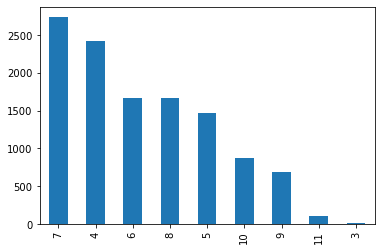

In [31]:
covid_only['Month'].value_counts().plot(kind='bar')

<AxesSubplot:>

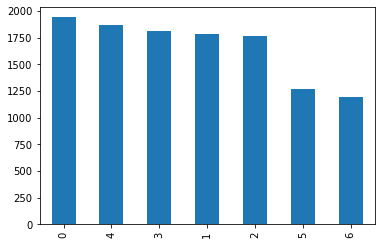

In [32]:
covid_only['Date / Time Opened'].dt.weekday.value_counts().plot(kind='bar') 
#monday is zero, sunday is 6, can rename for clarity's sake later

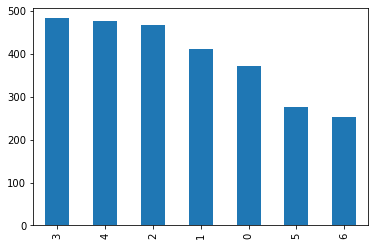

In [33]:
covid_only[covid_only['Month']==7]['Date / Time Opened'].dt.weekday.value_counts().plot(kind='bar'); 
#MAEVA to look at making a widget allowing you to select a month
#this shows which days had the most reported violations by day(0 is Monday, 6 is Sunday)

In [34]:
#MAEVA TIme series graph showing violations reported as time goes on from 0:00 to 23:59 and/or doing date+time timeline graph